In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
N_FEATURES = 12

In [11]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Class_label']


In [12]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train


In [13]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [14]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [15]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [16]:
# import os
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/Total_process_TT/'
# olsson_path
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_olsson/Total_process_TT/'
# naveen_path
path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/Total_process_17class/'

In [17]:
# file_path_train=path+'nina_pro_nb_DB2_Train'+'.'+'csv'
# file_path_train=path+'Train_data'+'.'+'csv'
file_path_train=path+'nina_pro_nl_DB2_17class_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/Total_process_17class/nina_pro_nl_DB2_17class_Train.csv


In [18]:
# file_path_test=path+'nina_pro_nb_DB2_Test'+'.'+'csv'
file_path_test=path+'nina_pro_nl_DB2_17class_Test'+'.'+'csv'
# file_path_test=path+'Test_data'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/Total_process_17class/nina_pro_nl_DB2_17class_Test.csv


In [19]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 27200000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,9.375800e-06,1.685000e-06,0.000003,6.936600e-07,0.000001,7.209800e-07,6.583300e-06,1.211300e-05,0.000003,0.000002,3.509500e-07,0.000015,1.0
1,8.694200e-06,1.699000e-06,0.000003,4.063000e-07,0.000002,2.081900e-07,5.249400e-06,1.095700e-05,0.000003,0.000003,4.065400e-07,0.000016,1.0
2,7.340100e-06,1.610800e-06,0.000003,7.668900e-08,0.000002,2.133700e-07,3.754900e-06,9.077400e-06,0.000003,0.000003,5.903600e-07,0.000018,1.0
3,5.409500e-06,1.336500e-06,0.000003,4.340700e-07,0.000003,7.698900e-07,2.557300e-06,7.125400e-06,0.000003,0.000004,1.144100e-06,0.000019,1.0
4,3.166900e-06,9.735900e-07,0.000004,6.582600e-07,0.000003,1.758900e-06,1.700500e-06,5.047900e-06,0.000003,0.000004,1.690300e-06,0.000021,1.0
5,8.619600e-07,5.974800e-07,0.000004,3.100100e-08,0.000003,8.001200e-07,1.053400e-06,2.272000e-06,0.000002,0.000004,1.895300e-06,0.000024,1.0
6,9.969000e-07,4.863600e-07,0.000004,9.359200e-07,0.000003,8.668800e-07,6.428200e-07,8.356700e-08,0.000002,0.000004,1.775400e-06,0.000026,1.0
7,1.884900e-06,8.984100e-07,0.000003,1.524400e-06,0.000004,1.744900e-06,5.085800e-07,4.688800e-07,0.000002,0.000004,1.129900e-06,0.000028,1.0
8,1.968300e-06,1.625000e-06,0.000003,1.564000e-06,0.000004,1.625000e-06,6.047600e-07,2.728100e-07,0.000002,0.000004,5.227800e-07,0.000028,1.0
9,1.580800e-06,2.419800e-06,0.000003,1.088100e-06,0.000004,1.167100e-07,8.292800e-07,1.075400e-06,0.000002,0.000003,9.181700e-07,0.000024,1.0


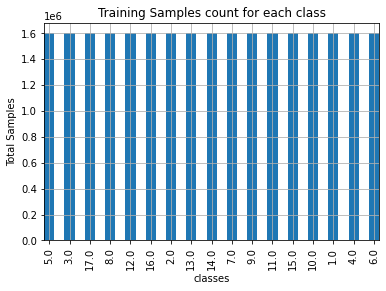

In [20]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [21]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 13600000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,2.268200e-06,0.000003,3.908400e-07,1.404900e-06,0.000003,1.135800e-06,0.000002,5.287100e-07,2.108200e-07,0.000004,8.372500e-07,0.000004,1.0
1,8.869900e-07,0.000004,2.979800e-07,1.116900e-06,0.000003,8.591500e-07,0.000002,2.050200e-06,3.901700e-07,0.000004,1.459100e-06,0.000005,1.0
2,5.793500e-07,0.000006,1.082700e-06,7.986600e-07,0.000004,5.530500e-07,0.000003,5.600500e-06,6.567400e-07,0.000004,2.132000e-06,0.000005,1.0
3,1.590700e-06,0.000006,2.088900e-06,8.173300e-07,0.000004,3.175900e-07,0.000002,5.804900e-06,6.458500e-07,0.000003,2.060700e-06,0.000005,1.0
4,2.234400e-06,0.000005,2.881100e-06,1.020700e-06,0.000004,1.676500e-07,0.000002,4.238200e-06,4.910600e-07,0.000003,1.493300e-06,0.000004,1.0
5,2.787100e-06,0.000004,2.855900e-06,1.187200e-06,0.000004,7.585100e-08,0.000002,3.624100e-06,3.944900e-07,0.000003,9.648600e-07,0.000004,1.0
6,3.289000e-06,0.000004,2.498800e-06,1.229700e-06,0.000003,3.673900e-08,0.000002,3.101800e-06,3.476900e-07,0.000003,3.245600e-07,0.000003,1.0
7,3.810700e-06,0.000004,2.577700e-06,1.092800e-06,0.000003,7.415900e-08,0.000003,1.638800e-06,3.207800e-07,0.000003,6.386200e-07,0.000003,1.0
8,4.309100e-06,0.000004,2.808100e-06,8.510800e-07,0.000003,1.691900e-07,0.000003,2.518000e-07,3.063700e-07,0.000003,1.635900e-06,0.000003,1.0
9,4.676100e-06,0.000004,2.733800e-06,5.925700e-07,0.000003,1.976900e-07,0.000004,2.130400e-06,2.911000e-07,0.000003,2.343300e-06,0.000003,1.0


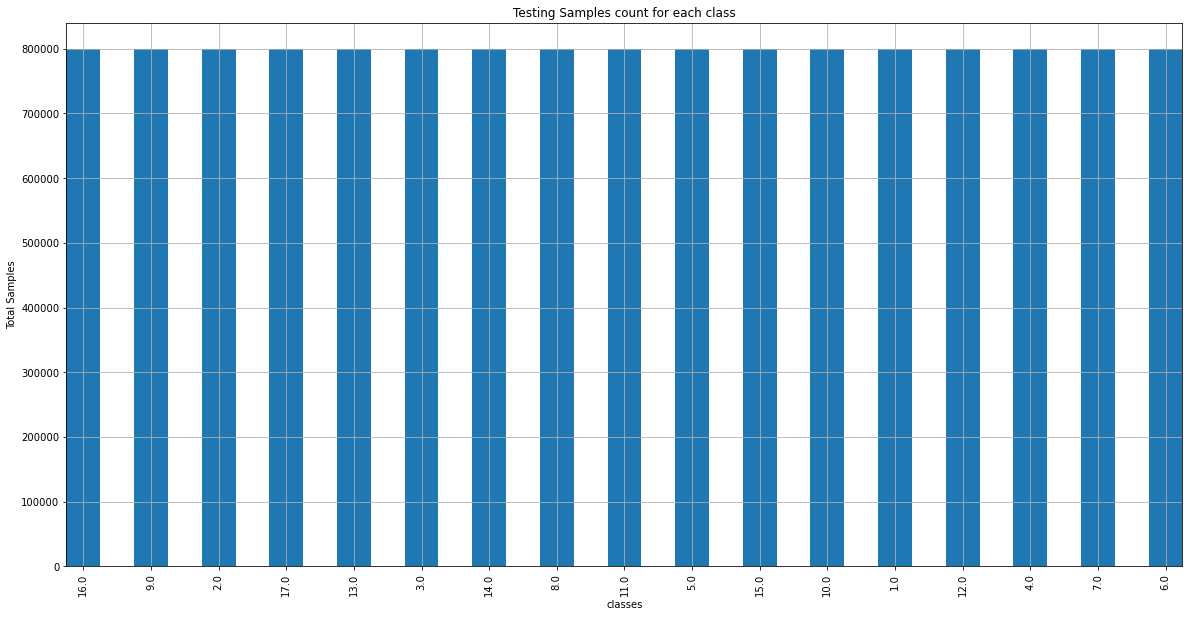

In [22]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
1,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
2,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
3,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000


In [24]:
# scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [25]:
# df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
1,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
2,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
3,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000


In [27]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [28]:
# df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [29]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [30]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1      C2      C3      C4      C5      C6      C7      C8  \
0        0.00001 0.00000 0.00000 0.00000 0.00000 0.00000 0.00001 0.00001   
1        0.00001 0.00000 0.00000 0.00000 0.00000 0.00000 0.00001 0.00001   
2        0.00001 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00001   
3        0.00001 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00001   
4        0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00001   
...          ...     ...     ...     ...     ...     ...     ...     ...   
27199995 0.00001 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00001   
27199996 0.00000 0.00000 0.00000 0.00001 0.00000 0.00000 0.00000 0.00000   
27199997 0.00000 0.00001 0.00000 0.00001 0.00000 0.00000 0.00000 0.00001   
27199998 0.00000 0.00001 0.00000 0.00001 0.00000 0.00000 0.00001 0.00001   
27199999 0.00000 0.00002 0.00000 0.00001 0.00000 0.00000 0.00001 0.00002   

              C9     C10     C11     C12  Class_label  ActivityEncoded  


In [31]:
# The number of steps within one time segment
TIME_PERIODS = 10000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10000

In [32]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [33]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [34]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [35]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (2719, 10000, 12)
2719 training samples
y_train shape:  (2719,)
10000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (2719, 17)


In [36]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (1359, 10000, 12)
1359 testing samples
y_test shape:  (1359,)


In [37]:
n_steps, n_length, n_depth, n_chan = 625, 16, 12, 1

x_train = x_train.reshape(x_train.shape[0], n_steps, n_length, n_depth, n_chan)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth, n_chan)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (2719, 625, 16, 12, 1)
x_test shape:  (1359, 625, 16, 12, 1)
n_outputs 17


In [38]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [39]:
def step_decay(epoch):
  initial_lrate = 1e-5
  drop = 0.1
  epochs_drop = 70.0
  lrate = initial_lrate * tf.math.pow(drop,  
          tf.math.floor((1+epoch)/epochs_drop))
  return lrate

In [40]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [41]:
seq_len = x_train.shape[1]
n_channel = x_train.shape[-1]
# n_vector = 64
d_k = 64
d_v = 64
n_heads = 8
ff_dim = 2048
# ff_dim2 = 1024
N_depth = 2
N_depth1 = 4

In [42]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [43]:
# 22 Transformer encoder
class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.3, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)
    # print('input_shape',inputshape)
#     self.ffn = PositionWiseFFN(self.ff_dim, input_shape[0][-1])
    self.ff_dense1 = Dense(self.ff_dim,input_shape=input_shape,activation="tanh")
    self.ff_dense2 = Dense(input_shape[0][-1],input_shape=input_shape)
#     self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, padding="same", activation='relu')
#     self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], padding="same", kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_out = self.attn_normalize(inputs[0] + attn_layer)

#     ff_layer = self.ffn(attn_out)
    ff_layer = self.ff_dense1(attn_out)
    ff_layer = self.ff_dense2(ff_layer)
#     ff_layer = self.ff_dropout(ff_layer)
    ff_out = self.ff_normalize(attn_out + ff_layer)
#     print("ff_layer",ff_layer.shape)
    return ff_out 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
#                    'ff_dim2': self.ff_dim2,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config  

In [44]:
# 23 Single and multiattention functions
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)

    q = self.query(inputs[0])
    k = self.key(inputs[1])
#     print("q_shape",q.shape)
#     print("k_shape",k.shape)
    attn_weights = tf.matmul(q, k, transpose_b=True)
#     attn_weights = tf.math.add(q, k)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
#     print("attn_shape", attn_weights.shape)
    
    v = self.value(inputs[2])
#     print("v_shape",v.shape)
    attn_out = tf.matmul(attn_weights, v)
#     attn_out = tf.math.add(attn_weights, v)
#     print("v1_shape",attn_out.shape)
    return attn_out     

In [45]:
class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
#     print("multi_out",len(attn))
    concat_attn = tf.concat(attn, axis=-1)
#     concat_attn = tf.transpose(concat_attn,perm=[0,2, 1])
#     print("concat_out",concat_attn.shape)
    multi_linear = self.linear(concat_attn)
#     print("multi_linear",multi_linear.shape)
    return multi_linear 

In [46]:
# 24 Time to vector conversion
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [47]:
# 25 model creation
def create_model():
  '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
  # print('time_embedding',time_embedding)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  #Conv1 = Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
       #                    input_shape=(none, n_steps,n_vector)) 
 
  '''Construct model'''
#   in_seq = Input(shape=(n_steps, n_length, n_depth))
  in_seq = Input(shape=(n_steps, n_length, n_depth, n_chan))
  x = in_seq
    
  x = Conv3D(64,kernel_size=(9,9,9),strides=2,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)     
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
  x = Dropout(0.3)(x)
  x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x)  
  x = Conv3D(64,kernel_size=(5,5,5),strides=1,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(3, 3, 1),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
#   x = Conv3D(64,3,strides=1,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
  x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
#   x = Activation('relu')(x)
  x = Conv3D(64,kernel_size=(3,3,3),strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
#   x = Conv3D(64,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
# #   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
  x = Activation('relu')(x)
  x = TimeDistributed(Flatten())(x)
  print("x_shape",x.shape)
  sp_att_out = x


#   sp_att_out = spatialattention()(x)
# #   tp_att_out = temporalattention()(x) 
# #   print("x_shape",x.shape)
# #   print("sp_att_shape",sp_att_out.shape)
# #   L_in = tf.matmul(x,sp_att_out,transpose_b=True)
#   L_in = LSTM(200,return_sequences=True)(sp_att_out)
#   L_in = Dropout(0.3)(L_in)
#   L_in = LSTM(200,return_sequences=True)(L_in)
#   L_in = LSTM(200,return_sequences=True)(L_in)
#   L_out = LSTM(200,return_sequences=True)(L_in)
# #   L_out = tf.matmul(L_in,tp_att_out,transpose_b=True)
#   tp_att_in = Dropout(0.3)(L_out)
#   tp_att_out = temporalattention()(tp_att_in)


  l = sp_att_out
  len = sp_att_out.shape[-2]  
  time_embedding = Time2Vector(len)
  x1 = time_embedding(sp_att_out)
  print("x1_shape",x1.shape)
  x = Concatenate(axis=-1)([l, x1])
  x2 = x
  for n in range(N_depth):  
        x = attn_layer1((x, x, x))
  print("x_shape",x.shape)
  L_out = x 
#   tp_att_out = temporalattention()(L_out)

#   x3 = tf.add(x, x2)
#   for n in range(N_depth1):  
#         x3 = attn_layer2((x3, x3, x3))
#   print("x3_shape",x3.shape)
    
#   for n in range(N_depth):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
#   for n in range(N_depth1):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
#   z = concatenate([x, x2])
  z = L_out
#   z = tf.add(x, x2) 
  print("z_shape",z.shape)
#   l = z
#   len = z.shape[-2]  
#   time_embedding = Time2Vector(len)
#   z1 = time_embedding(z)
#   print("z1_shape",z1.shape)
#   z = Concatenate(axis=-1)([l, z1])
#   for n in range(N_depth1):  
#         z = attn_layer2((z, z, z))
# #   print("z_shape",z.shape)
#   z = Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer='he_normal',strides=1,kernel_regularizer=l1(1e-04))(z)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   z = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(z)
#   z = Activation('tanh')(z)
# #   z = MaxPooling1D(pool_size=(3),strides=1))(z) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   z = Dropout(0.3)(z)
  z = Flatten()(z)
#   x = Flatten()(x)
  #x = Dense(2048, activation='tanh')(x)
  #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
#   x = Flatten()(x)
#   x = Dropout(0.5)(x)
  z = Dense(512, activation='tanh')(z)
  z = Dense(128, activation='tanh')(z)  
#   z = Dense(64, activation='tanh')(z)
#   z = LayerNormalization(epsilon=1e-6)(z)
#   z = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(z)
#   x = Dropout(0.5)(x)  
#   x = Dense(512, activation='relu')(x)
  z = Dropout(0.3)(z)
  out = Dense(n_outputs, activation='softmax')(z)

  model = Model(inputs=in_seq, outputs=out)
  # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [48]:
# # 25 model creation
# def create_model():
#   '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
#   # print('time_embedding',time_embedding)
#   attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

#   #Conv1 = Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#        #                    input_shape=(none, n_steps,n_vector)) 
 
#   '''Construct model'''
#   in_seq = Input(shape=(seq_len, n_channel))
#   x = in_seq
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
#   x1 = time_embedding(in_seq)
#   x = Concatenate(axis=-1)([x, x1])

#   x = Conv1D(n_vector,5,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)     
# # #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# #   x = Dropout(0.3)(x)
#   x = Conv1D(n_vector,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# #   x = Dropout(0.3)(x)
# #   x = Activation('relu')(x)
# #   y = Conv1D(512, 3, padding='same', kernel_initializer='he_normal')(x) 
# #   print("x_shape",x.shape)
# #   pause  
# #   x1 = time_embedding(in_seq)
# #   x = Concatenate(axis=-1)([x, x1])
# #   x = Bidirectional(LSTM(100,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Bidirectional(LSTM(100,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
#   for n in range(N_depth):  
#         x = attn_layer1((x, x, x))
        
#   x = Bidirectional(LSTM(100,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
#   x = Bidirectional(LSTM(100,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
    
# #   x = GlobalAveragePooling1D(data_format='channels_last')(x)
#   x = Flatten()(x)
# #   x = Flatten()(x)
#   #x = Dense(2048, activation='tanh')(x)
#   #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
# #   x = Flatten()(x)
# #   x = Dropout(0.5)(x)
#   x = Dense(512, activation='tanh')(x)
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
# #   x = Dropout(0.5)(x)  
# #   x = Dense(512, activation='relu')(x)
#   x = Dropout(0.3)(x)
#   out = Dense(n_outputs, activation='softmax')(x)

#   model = Model(inputs=in_seq, outputs=out)
#   # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#   # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model

In [49]:
# 26 model summary
model = create_model()
model.summary()

x_shape (None, 311, 2048)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
x1_shape (None, 311, 2)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When fi

In [50]:
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB2_codes/transformer/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=75, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 625, 16, 12, 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 313, 8, 6, 64 46720       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 313, 8, 6, 64 256         conv3d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 313, 8, 6, 64 0           batch_normalization[0][0]        
______________________________________________________________________________________________

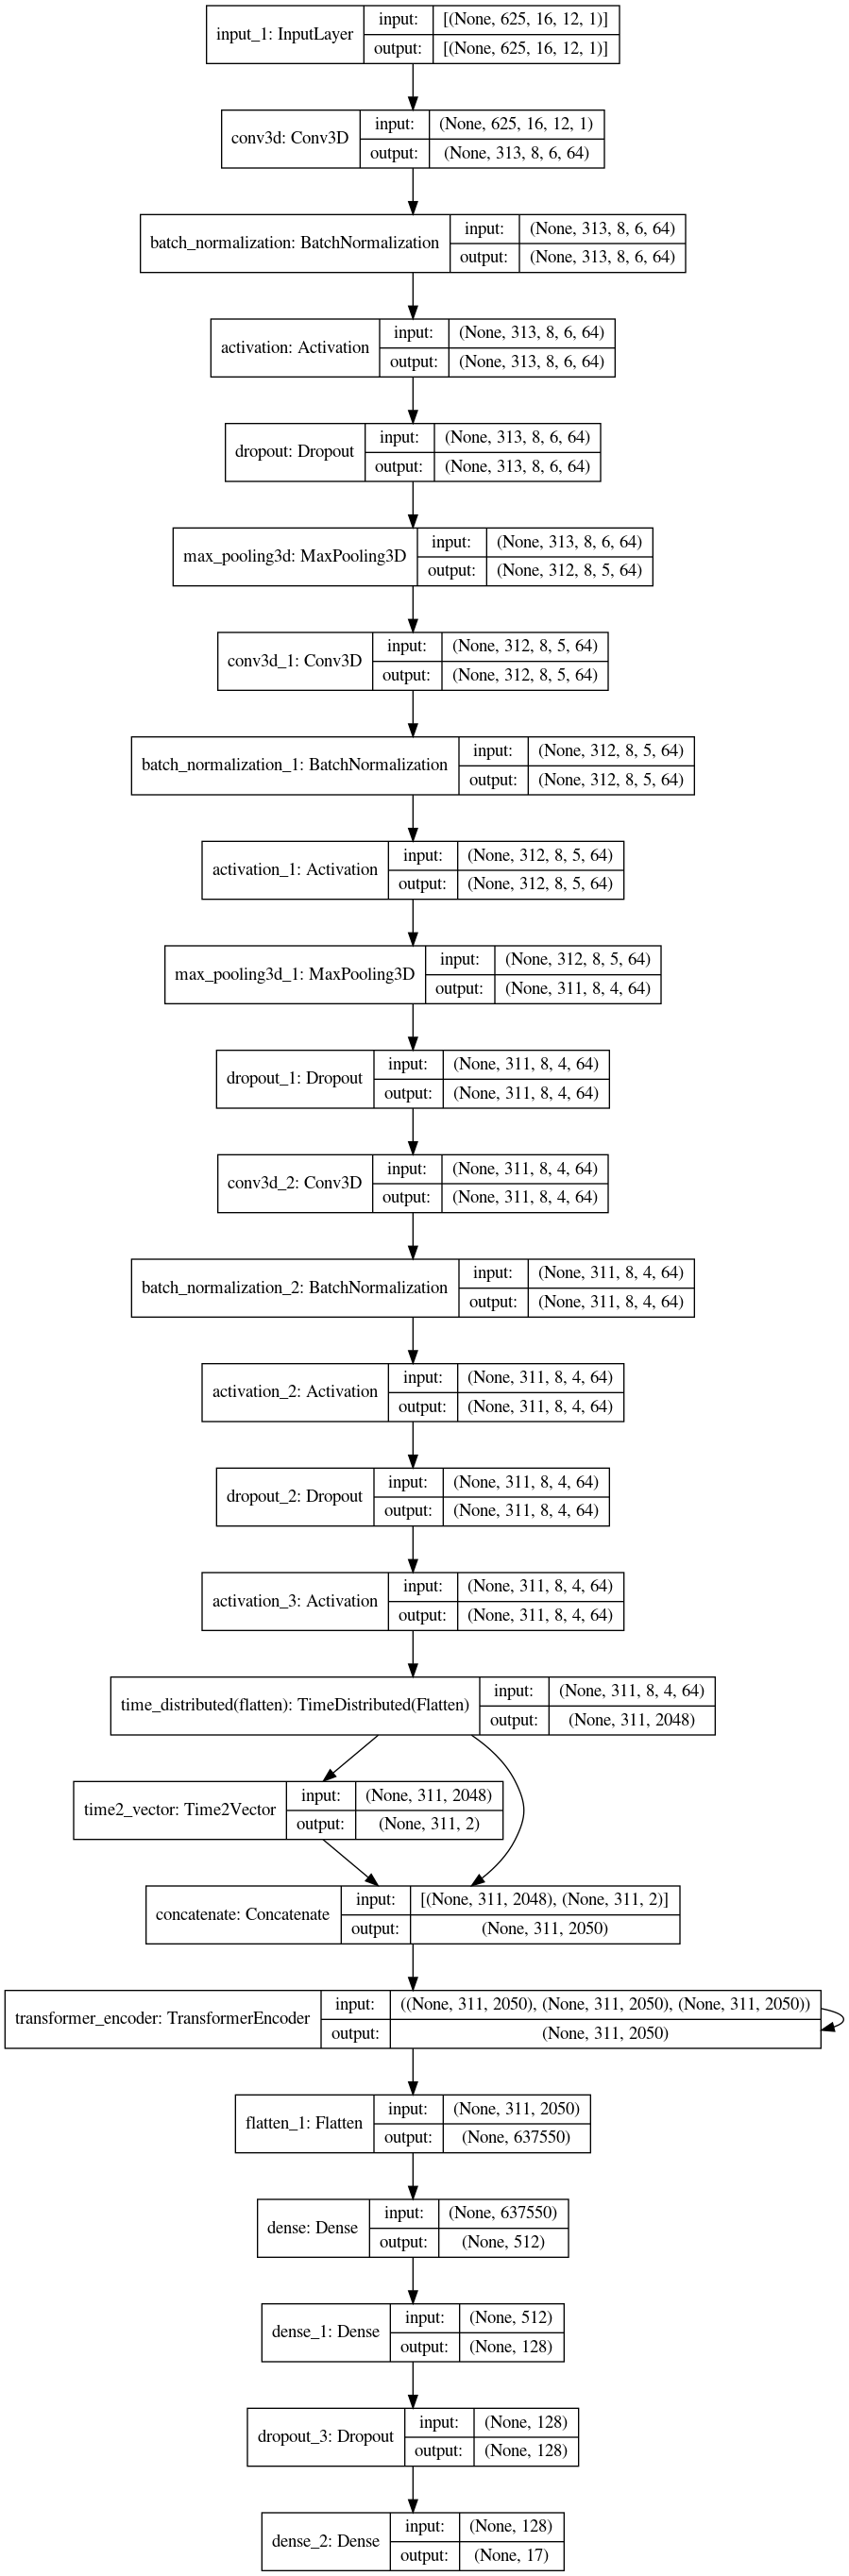

In [51]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB2_codes/transformer/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [52]:
if tf.test.gpu_device_name(): 

  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

 print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [53]:
verbose, epochs, batch_size = 0, 200, 64

In [54]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB2_codes/transformer/LSTM_ninaDB4_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/200
43/43 [==============================] - 84s 2s/step - loss: 3.6188 - accuracy: 0.0535 - val_loss: 3.1416 - val_accuracy: 0.0589

Epoch 00001: val_accuracy improved from -inf to 0.05887, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/transformer/checkpoint.hdf5
Epoch 2/200
43/43 [==============================] - 58s 1s/step - loss: 3.2046 - accuracy: 0.0686 - val_loss: 3.1670 - val_accuracy: 0.0589

Epoch 00002: val_accuracy did not improve from 0.05887
Epoch 3/200
43/43 [==============================] - 56s 1s/step - loss: 3.1020 - accuracy: 0.0907 - val_loss: 3.1009 - val_accuracy: 0.0589

Epoch 00003: val_accuracy did not improve from 0.05887
Epoch 4/200
43/43 [==============================] - 57s 1s/step - loss: 3.0115 - accuracy: 0.1103 - val_loss: 3.1023 - val_accuracy: 0.0618

Epoch 00004: val_accuracy improved from 0.05887 to 0.06181, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/transformer/checkpoint.hdf5
Epoch 5/200
43/43 [============

43/43 [==============================] - 60s 1s/step - loss: 0.1510 - accuracy: 1.0000 - val_loss: 0.7247 - val_accuracy: 0.8153

Epoch 00037: val_accuracy did not improve from 0.82193
Epoch 38/200
43/43 [==============================] - 60s 1s/step - loss: 0.1517 - accuracy: 1.0000 - val_loss: 0.6945 - val_accuracy: 0.8160

Epoch 00038: val_accuracy did not improve from 0.82193
Epoch 39/200
43/43 [==============================] - 63s 1s/step - loss: 0.1487 - accuracy: 1.0000 - val_loss: 0.9119 - val_accuracy: 0.7417

Epoch 00039: val_accuracy did not improve from 0.82193
Epoch 40/200
43/43 [==============================] - 57s 1s/step - loss: 0.1454 - accuracy: 1.0000 - val_loss: 0.8436 - val_accuracy: 0.7756

Epoch 00040: val_accuracy did not improve from 0.82193
Epoch 41/200
43/43 [==============================] - 57s 1s/step - loss: 0.1457 - accuracy: 1.0000 - val_loss: 1.0874 - val_accuracy: 0.6873

Epoch 00041: val_accuracy did not improve from 0.82193
Epoch 42/200
43/43 [===

43/43 [==============================] - 58s 1s/step - loss: 0.1253 - accuracy: 1.0000 - val_loss: 0.7830 - val_accuracy: 0.7910

Epoch 00078: val_accuracy did not improve from 0.86019
Epoch 79/200
43/43 [==============================] - 57s 1s/step - loss: 0.1249 - accuracy: 1.0000 - val_loss: 0.8275 - val_accuracy: 0.7792

Epoch 00079: val_accuracy did not improve from 0.86019
Epoch 80/200
43/43 [==============================] - 57s 1s/step - loss: 0.1252 - accuracy: 1.0000 - val_loss: 0.7770 - val_accuracy: 0.7940

Epoch 00080: val_accuracy did not improve from 0.86019
Epoch 81/200
43/43 [==============================] - 60s 1s/step - loss: 0.1252 - accuracy: 1.0000 - val_loss: 0.7842 - val_accuracy: 0.7918

Epoch 00081: val_accuracy did not improve from 0.86019
Epoch 82/200
43/43 [==============================] - 58s 1s/step - loss: 0.1253 - accuracy: 1.0000 - val_loss: 0.8192 - val_accuracy: 0.7815

Epoch 00082: val_accuracy did not improve from 0.86019
Epoch 83/200
43/43 [===

43/43 [==============================] - 60s 1s/step - loss: 0.1234 - accuracy: 1.0000 - val_loss: 0.7114 - val_accuracy: 0.8138

Epoch 00119: val_accuracy did not improve from 0.86019
Epoch 120/200
43/43 [==============================] - 59s 1s/step - loss: 0.1237 - accuracy: 1.0000 - val_loss: 0.7708 - val_accuracy: 0.7954

Epoch 00120: val_accuracy did not improve from 0.86019
Epoch 121/200
43/43 [==============================] - 59s 1s/step - loss: 0.1232 - accuracy: 1.0000 - val_loss: 0.7988 - val_accuracy: 0.7844

Epoch 00121: val_accuracy did not improve from 0.86019
Epoch 122/200
43/43 [==============================] - 59s 1s/step - loss: 0.1239 - accuracy: 1.0000 - val_loss: 0.7374 - val_accuracy: 0.8043

Epoch 00122: val_accuracy did not improve from 0.86019
Epoch 123/200
43/43 [==============================] - 59s 1s/step - loss: 0.1238 - accuracy: 1.0000 - val_loss: 0.7122 - val_accuracy: 0.8131

Epoch 00123: val_accuracy did not improve from 0.86019
Epoch 124/200
43/43

KeyboardInterrupt: 

In [ ]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

In [ ]:
model.save('/media/naveen/nav/mat_codes/nina_DB2_codes/transformer/CNN_LSTM_nina_5X97')

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
DB2a=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= DB2a.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
import csv
print(len(history.history['loss']))
# print(history.history['loss'])
# result=csv.writer(open("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/trainvsval.csv","w"))
# result = csv.reader(open("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/trainvsval.csv","r"))
train_data = history.history['loss']
val_data= history.history['val_loss']

file = open("/media/naveen/nav/mat_codes/nina_DB2_codes/transformer/trainvsval.csv", 'w+', newline ='')

for i in range(len(train_data)):
    file.write("{}, {}\n".format(train_data[i], val_data[i]))
file.close()

In [ ]:
result = csv.reader(open("/media/naveen/nav/mat_codes/nina_DB2_codes/transformer/trainvsval.csv","r"))
# print(len(result))
train_data =[]
val_data=[]
for line in result:
#     data = line.split(" ")
    train_data.append(float(line[0]))
    val_data.append(float(line[1]))
# print(train_data)
# print(len(train_data))
# print(type(train_data))
# print(train_data)
# for i in range(len(train_data)):

# ax= figDB2.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

figDB2=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# ax.spines["top"].set_linewidth(3)
# ax.spines["top"].set_linestyle("-")
# ax.spines["bottom"].set_linewidth(3)
# ax.spines["bottom"].set_linestyle("-")
# ax.spines["left"].set_linewidth(3)
# ax.spines["left"].set_linestyle("-")
# ax.spines["right"].set_linewidth(3)
# ax.spines["right"].set_linestyle("-")

plt.plot(train_data, 'r-', linewidth=3,label='Loss on training data')
plt.plot(val_data, 'b-',linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for NinaPro DB2',fontsize=18, weight = 'bold')
plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
figDB2.savefig('/media/naveen/nav/plots/transformer/NinaPro_DB2_25X400.eps',transparent=False)
# figDB2.savefig('/media/naveen/nav/plots/NinaPro_DB2_25X400.pdf',transparent=False)

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figDB2.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figDB2=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
ax= figDB2.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
plt.title('Loss curve for NinaPro DB2',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=16, weight = 'bold')
plt.xlabel('no of training epochs',fontsize=16, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))